<a href="https://colab.research.google.com/github/kronze1996/Credit-Card-Default/blob/main/Kartikey_Sharma_Team_3_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Introduction 

##Prediction of Credit card defaulters 
In today’s world most people have a credit card by the time they turn eighteen years old. It is normal to swipe a credit card to buy your children Christmas, because credit card companies now offer rewards where an individual receives money back or maybe even a discount flight. People used to not want to buy their children’s Christmas on credit, but rather work a little harder and save up the money to buy it.

So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka **credit card defaulters**.

***Here we will tackle this problem by predicting people who will or might fall into the category of credit card defaulters.***

#Exploratory Data Analysis

###Basic Data Analysis

Now as for our first task we will implement all the libraries

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/default of credit card clients.xls"
df = pd.read_excel(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [5]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
df[(df['X6']==0)&(df['X18']==0)][['X6','X12','X18']]

,X6,X12,X18
233,0,102800,0
259,0,62170,0
612,0,3280,0
623,0,7624,0
868,0,29109,0
...,...,...,...
29537,0,103632,0
29678,0,16912,0
29744,0,4166,0
29781,0,51183,0


In [7]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,11,11,22724,22347,22027,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,14720,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [8]:
del df['Unnamed: 0']

###Gender

Plotting gender graph where 1,2 are male and female respectively.

In [9]:
df['X2'].value_counts()

2      18112
1      11888
SEX        1
Name: X2, dtype: int64

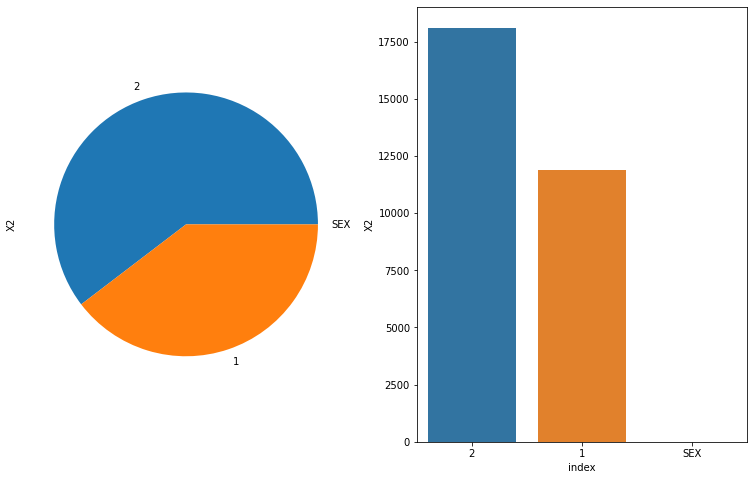

<Figure size 936x576 with 0 Axes>

In [10]:
# female = df[df['X2'] == 2].value_counts()
# male = df[df['X2'] == 1].value_counts()
# gender=[female,male]
# plt.figure()
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
Day_df=df['X2'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['X2'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='X2',data=Day_df,ax = axes[1])

So from here we can see that the most number of credit card holders are be women.

###Education status

Plotting graph for all education status where 1 is graduate school passed, 2 is university passed, 3 is high school passed and 4 are others

In [11]:
df['X3'].value_counts()

2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
EDUCATION        1
Name: X3, dtype: int64

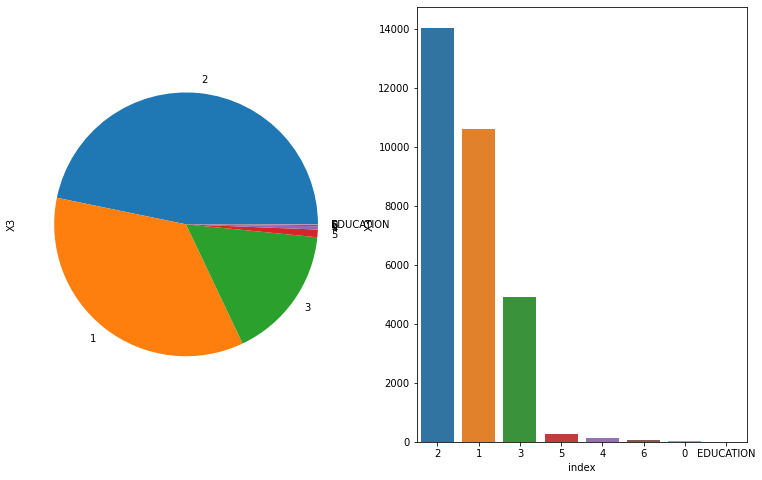

<Figure size 936x576 with 0 Axes>

In [12]:
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
Day_df=df['X3'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['X3'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='X3',data=Day_df,ax = axes[1])

In [14]:
# df[df['X2']==2]['']

###Marital Status

Plotting graph of number of people with their marital status as 1, 2 and 3 represents married, single and others respectively.

In [15]:
df['X4'].value_counts()

2           15964
1           13659
3             323
0              54
MARRIAGE        1
Name: X4, dtype: int64

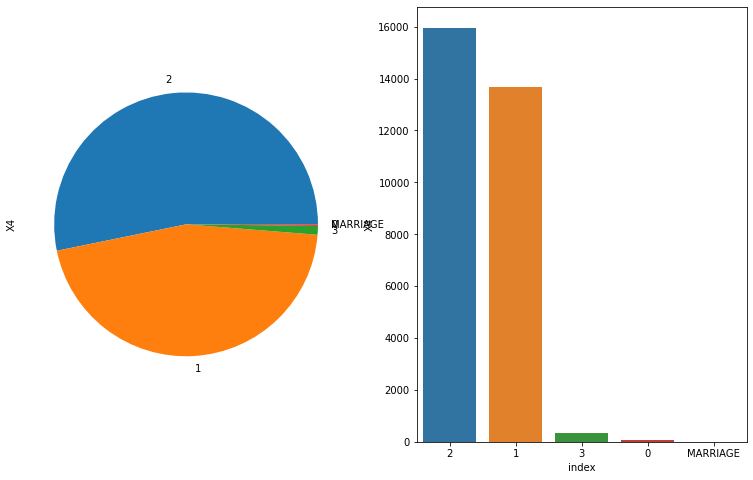

<Figure size 936x576 with 0 Axes>

In [16]:
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
Day_df=df['X4'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['X4'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='X4',data=Day_df,ax = axes[1])

###Age

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [80]:
df['X5'].value_counts()

29     1605
27     1477
28     1409
30     1395
26     1256
31     1217
25     1186
34     1162
32     1158
33     1146
24     1127
35     1113
36     1108
37     1041
39      954
38      944
23      931
40      870
41      824
42      794
44      700
43      670
45      617
46      570
22      560
47      501
48      466
49      452
50      411
51      340
53      325
52      304
54      247
55      209
56      178
57      122
58      122
59       83
21       67
60       67
61       56
62       44
63       31
64       31
66       25
65       24
67       16
69       15
70       10
68        5
73        4
75        3
71        3
72        3
79        1
74        1
AGE       1
Name: X5, dtype: int64

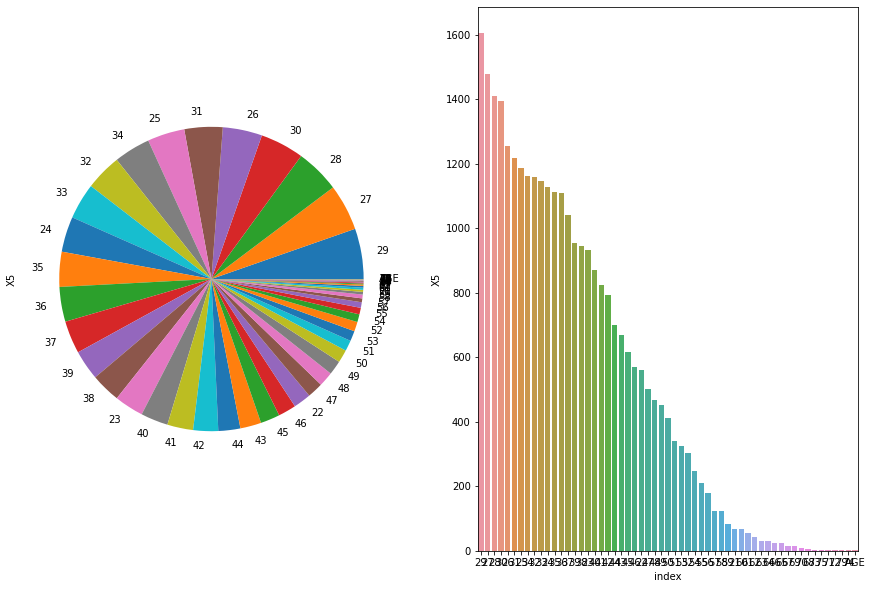

<Figure size 936x576 with 0 Axes>

In [81]:
fig, axes = plt.subplots(ncols=2,figsize=(15,10))
Day_df=df['X5'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['X5'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='X5',data=Day_df,ax = axes[1])

##Basic Analysis

KeyError: ignored

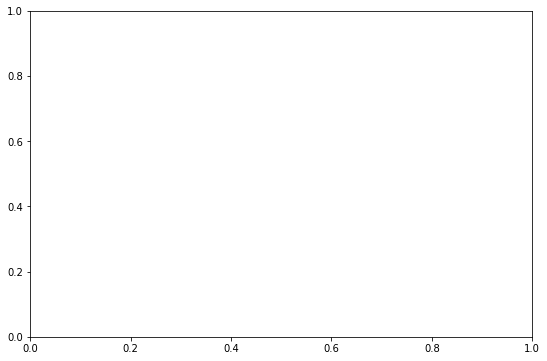

In [82]:
# plot a boxplot for the label by each categorical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

##Feature Engineering

SyntaxError: ignored